Participants : Rushabh Malode


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Datasets

df = pd.read_csv("/content/drive/MyDrive/Mini Project/loan.zip (Unzipped Files)/loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

### Basic Data Analysis

In [ ]:
df.shape

(39717, 111)

In [ ]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

**Observation:**

1. data has total 39717 Rows and 111 columns.
2. There are columns having no values. So, better to drop those columns which has zero impact.

In [ ]:
# Drop the columns having morethan 20% null values

df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.20)], axis=1)
df.shape

(39717, 53)

Now we have 53 columns after dropping

In [ ]:
df.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [ ]:
# To check the unique values for each columns

df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In the above observation there are columns having 39717 unique values which means every entry is unique and 1 which indicates that every value of the variable is same for every rows. So, these two columns are not impacting or not required for the further analysis. So, dropping them makes dataframe more usable and easy to understand.

In [ ]:
# Drop the columns having unique values 1 and 39717

for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col,inplace=True,axis=1)

for col in df.columns:
    if len(df[col].unique()) == len(df):
        df.drop(col,inplace=True,axis=1)
print("After droping the columns, we have:")
print(" ")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

After droping the columns, we have:
 
Number of Rows: 39717
Number of Columns: 41


### Statistical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

We have both categorical and numerical columns with this dataset.

In [ ]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,15000.00000,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,15000.00000,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,14400.00000,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,430.78000,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,82300.00000,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,18.60000,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.00000,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.00000,8.000000e+00
open_acc,39717.0,9.294408,4.400282,2.00,6.00,9.000000,12.00000,4.400000e+01
pub_rec,39717.0,0.055065,0.237200,0.00,0.00,0.000000,0.00000,4.000000e+00


**Observations:**
- Minimum amount of loan given is 500 and maximum is 35000
- Highest annual income provided by the borrower is 6000000 and lowest income is 4000.
- Maximum interest received 23563.68 and least interest is 0.

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
term,39717,2,36 months,29096
int_rate,39717,371,10.99%,956
grade,39717,7,B,12020
sub_grade,39717,35,B3,2917
emp_title,37258,28820,US Army,134
emp_length,38642,11,10+ years,8879
home_ownership,39717,5,RENT,18899
verification_status,39717,3,Not Verified,16921
issue_d,39717,55,Dec-11,2260
loan_status,39717,3,Fully Paid,32950


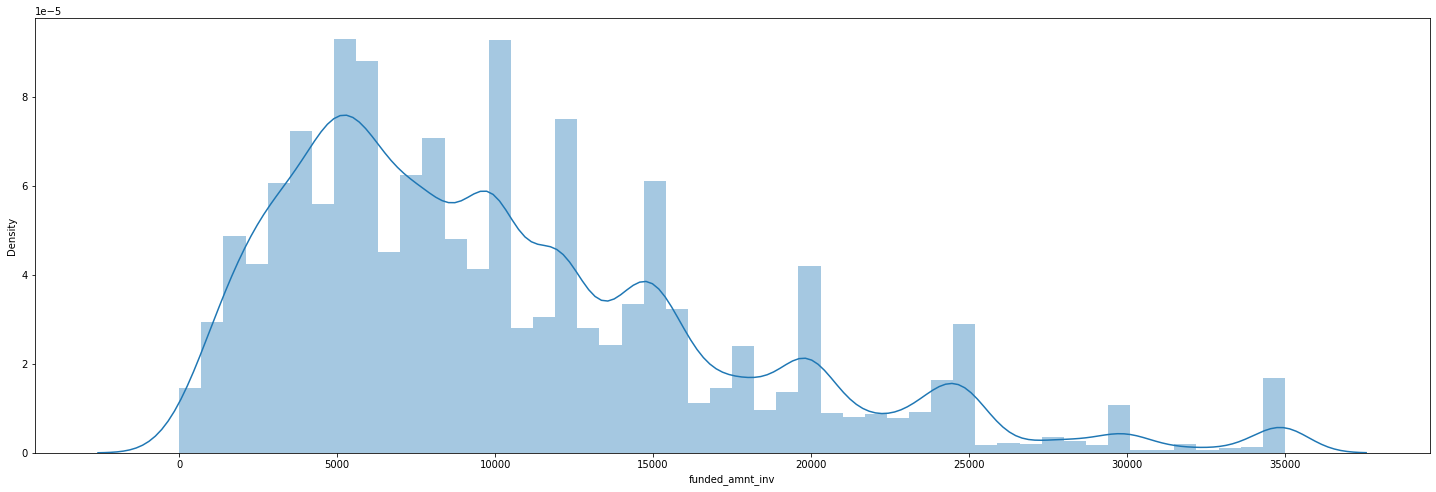

In [ ]:
plt.figure(figsize=(25,8))
sns.distplot(df.funded_amnt_inv, kde=True)
plt.show()

From this plot we can see that amount funded to most of the people were between 5k to 10k 

## Univariate Analysis

Below is the 5 number summary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

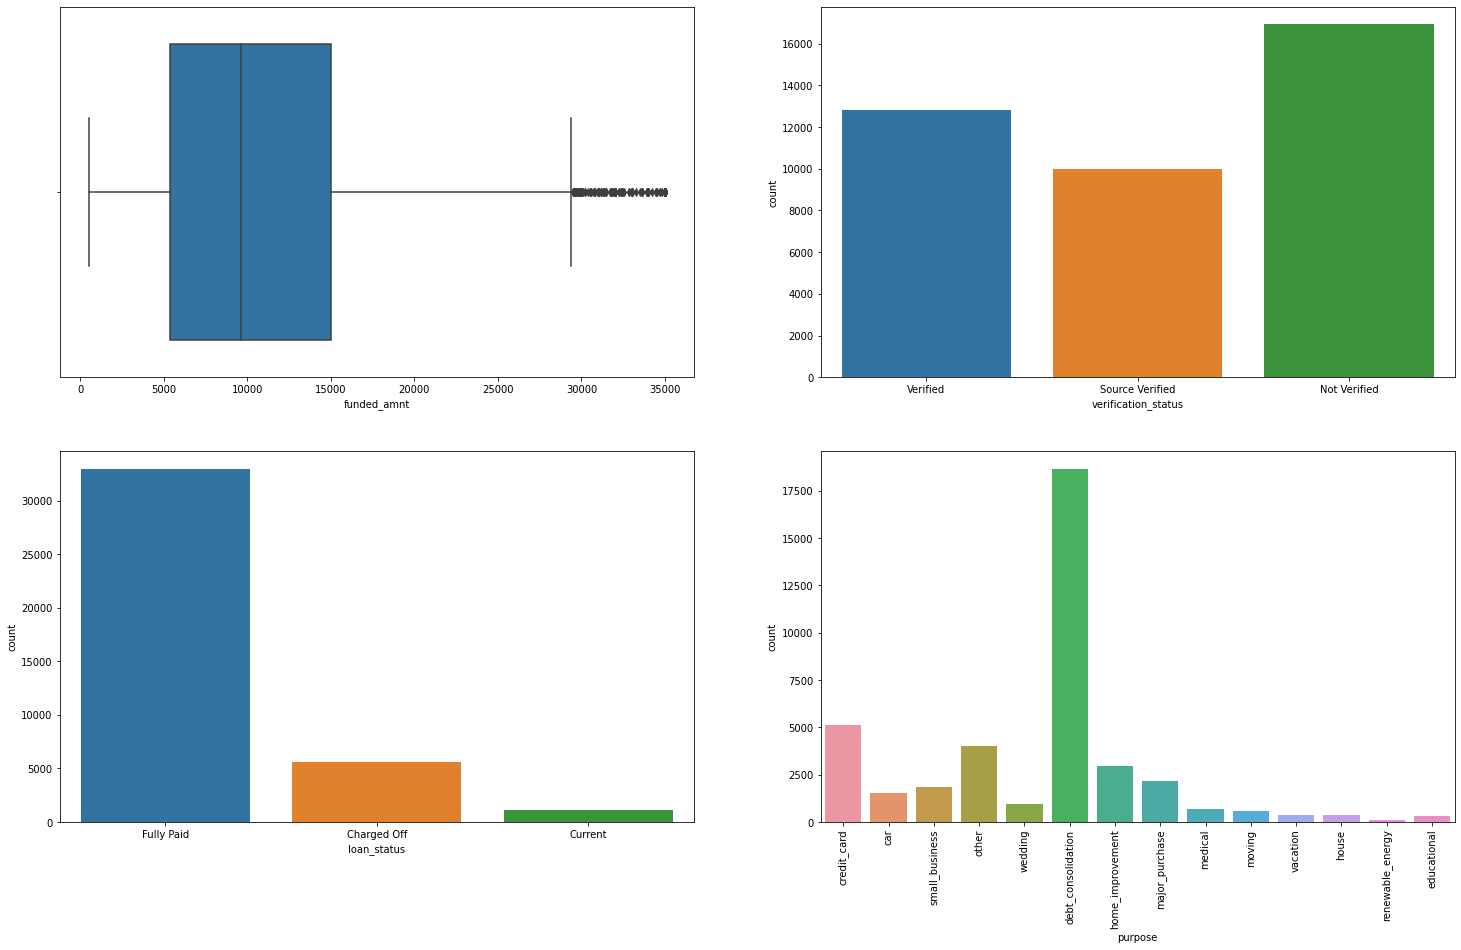

In [ ]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(df.funded_amnt, ax=ax1);
sns.countplot(df.verification_status, ax=ax2);

sns.countplot(x=df['loan_status'], data=df, ax=ax3);

sns.countplot(x=df.purpose, data=df, color=None, ax=ax4);

plt.xticks(rotation=90)

Here we plotted four graphs,
1. Boxplot of funded amount
2. Verification status- MAximum are not verified
3. Loan status
4. purpose- For what purpose people has taken loans 

## Bivariate Analysis

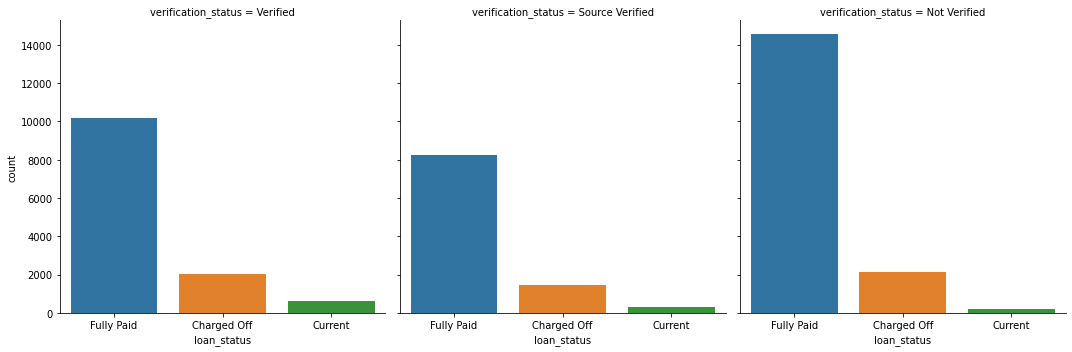

In [ ]:
sns.factorplot("loan_status", col='verification_status', col_wrap=3, data=df, kind='count');

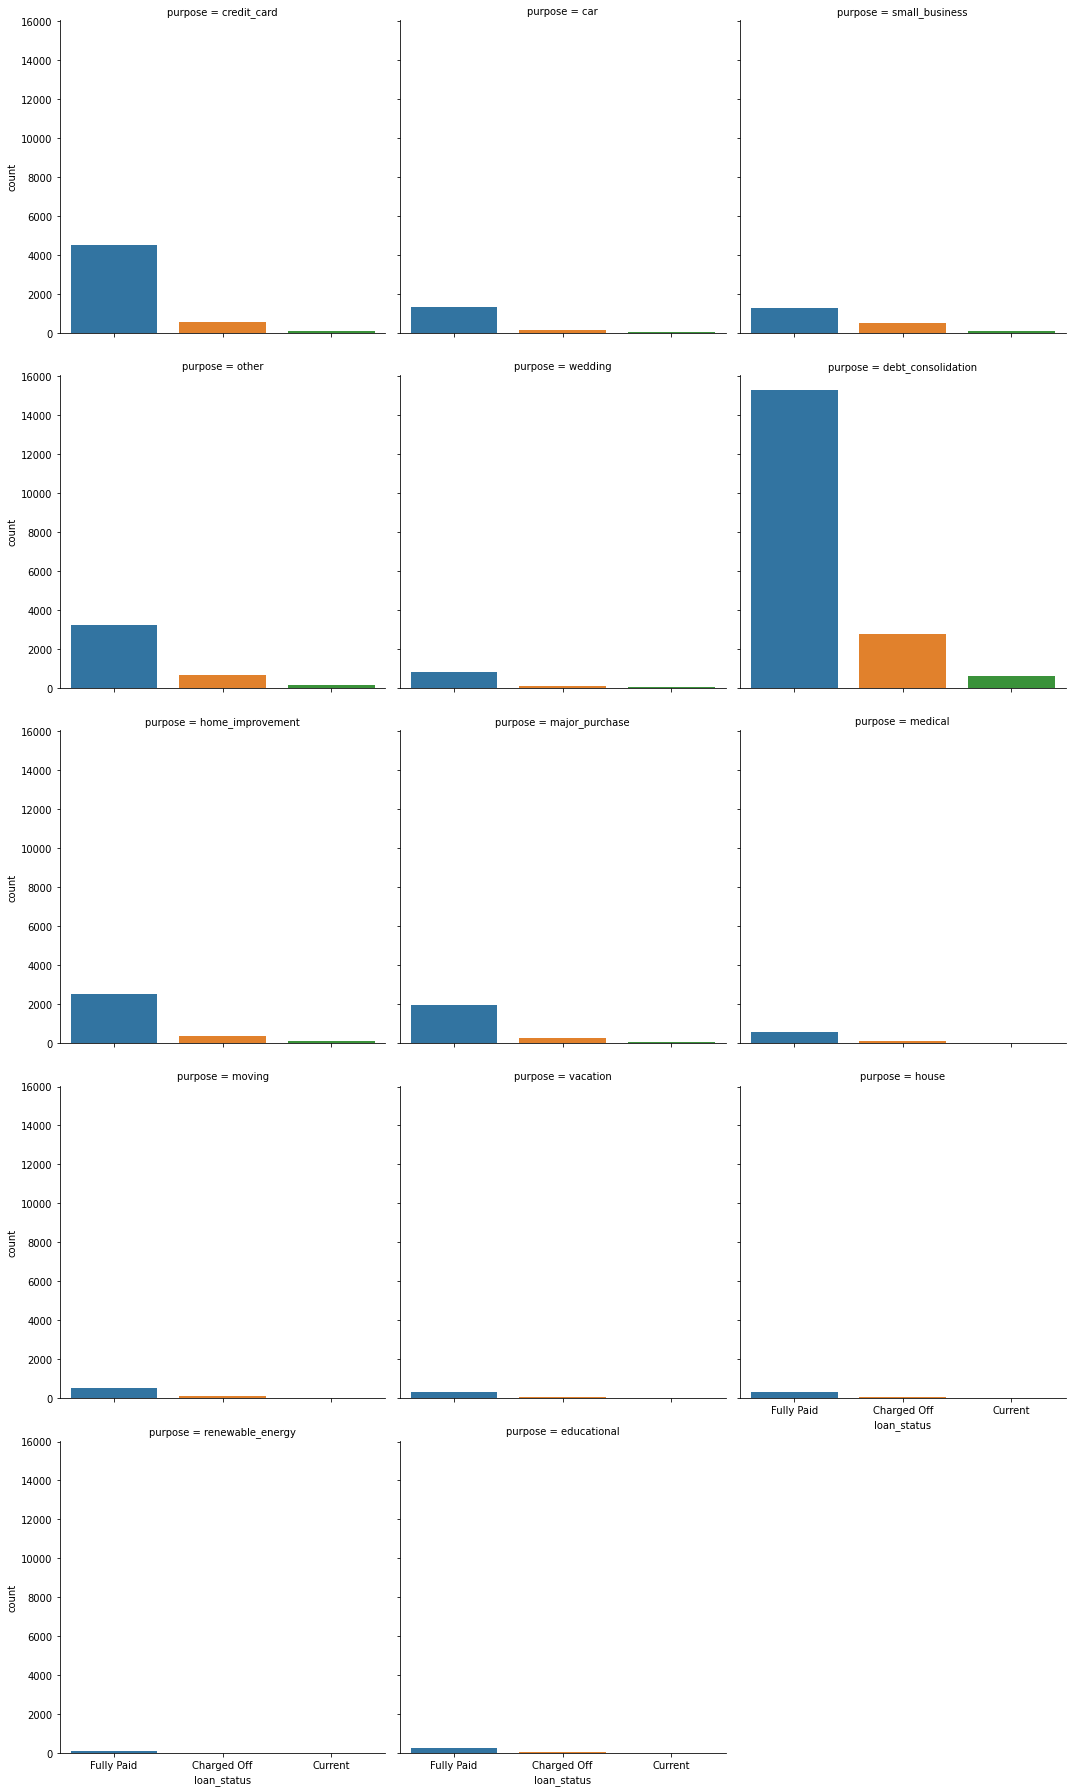

In [ ]:
sns.factorplot("loan_status", col='purpose', col_wrap=3, data=df, kind='count');

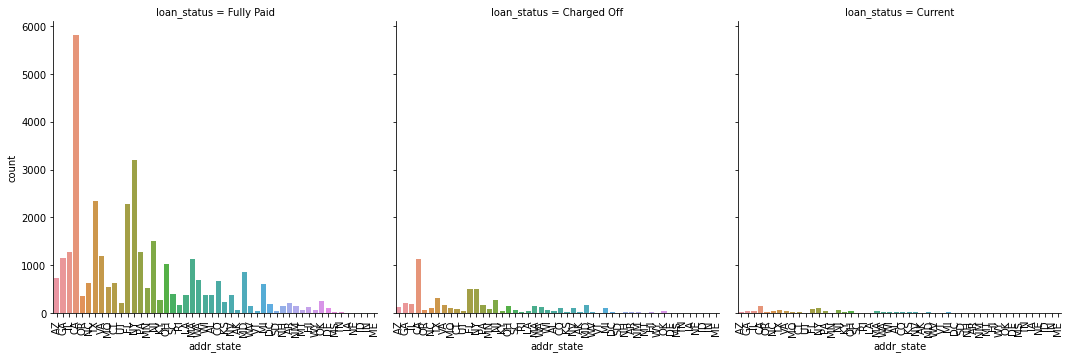

In [ ]:
a= sns.factorplot("addr_state", col='loan_status', col_wrap=3, data=df, kind='count');
a.set_xticklabels(rotation=90);

From the above plot

Those who belongs to CA state having more defaulters

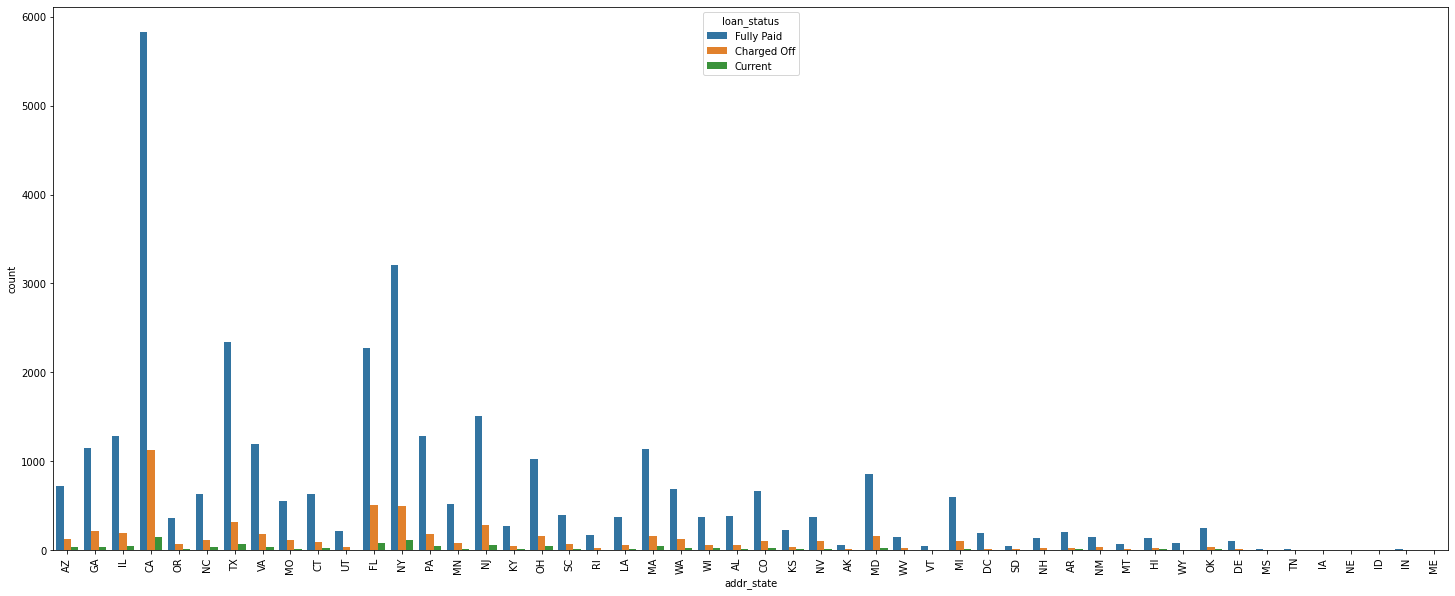

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x=df.addr_state, hue=df.loan_status)
plt.xticks(rotation=90)
plt.show()

Observation 

1. CA Address state has more fully paid loans as compared to other address states.
2. CA has more Charged off or defaulters as compared to other states.   

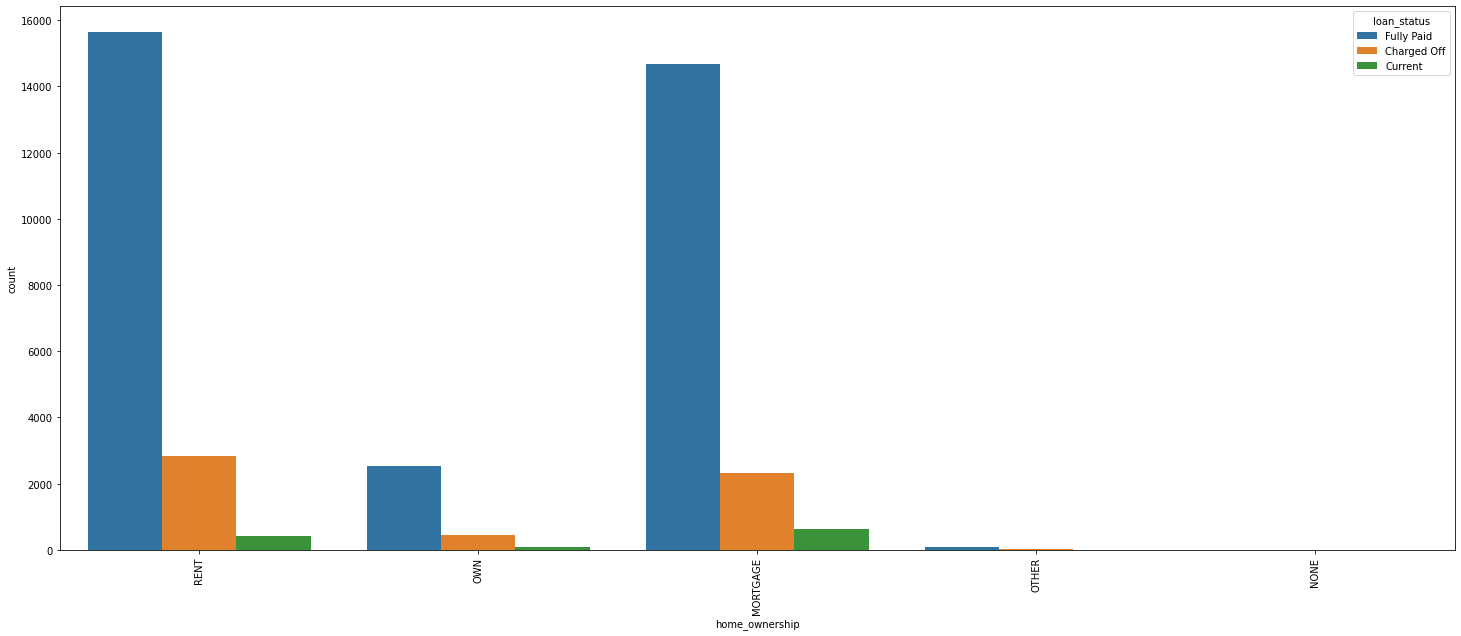

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x=df.home_ownership, hue=df.loan_status)
plt.xticks(rotation=90);

Observation 

1. Rent people Has more fully paid loans but also their having more charged off

Rent vs grade

Rent vs Verification

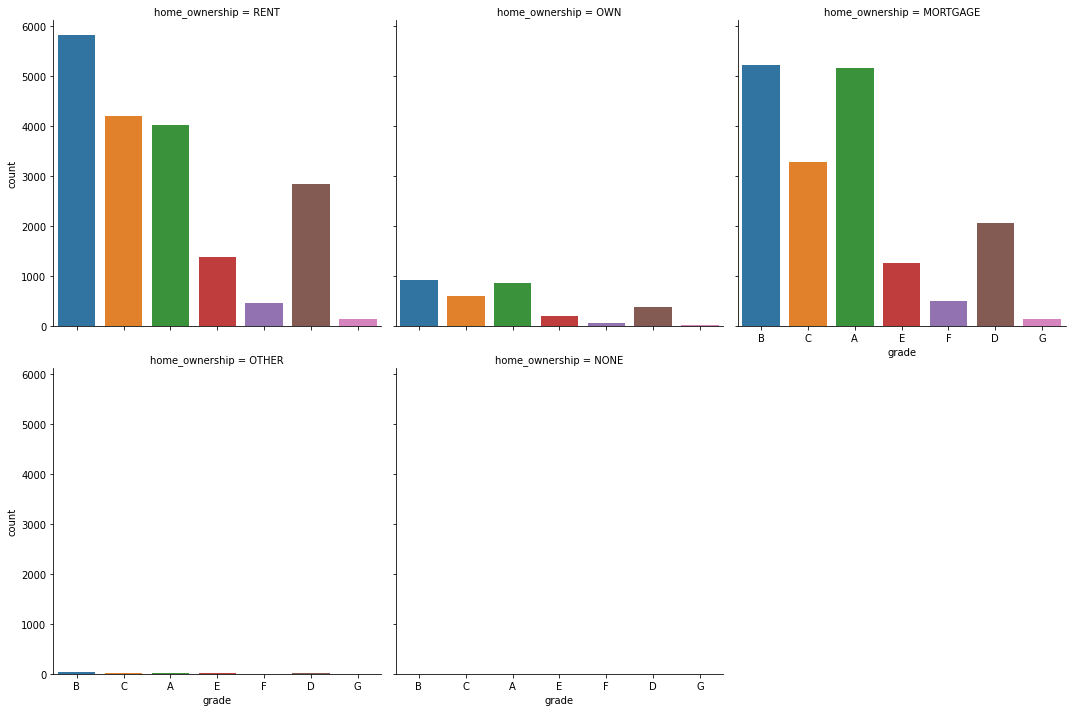

In [ ]:
sns.factorplot("grade", col='home_ownership', col_wrap=3, data=df, kind='count');

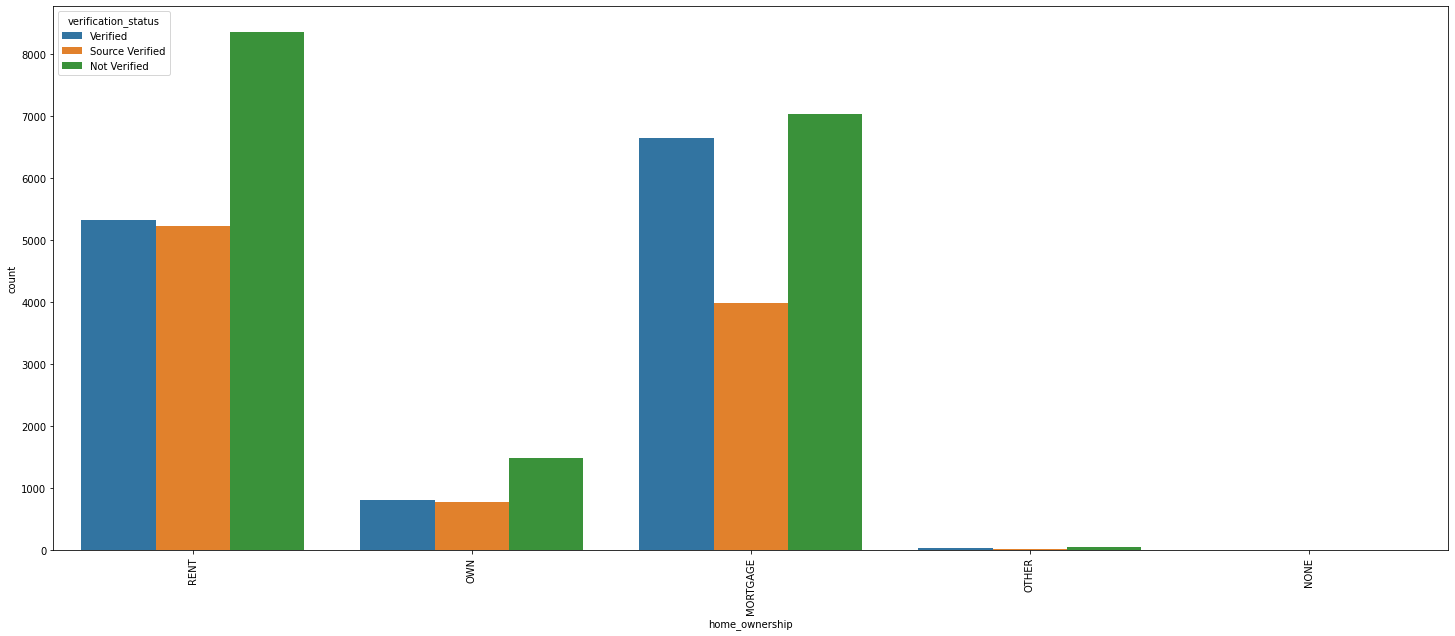

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x=df.home_ownership, hue=df.verification_status)
plt.xticks(rotation=90);

From the above plot we can say that we must focus on verification status because majority are not verified

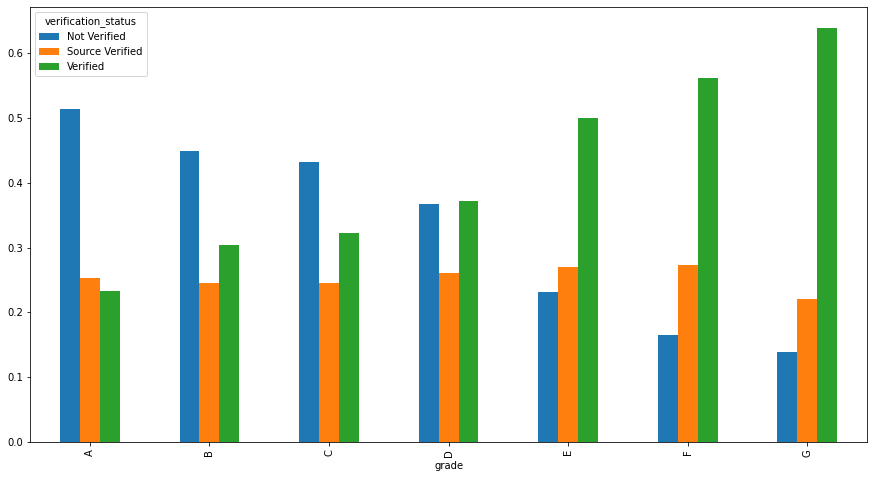

In [ ]:
df.groupby('grade')['verification_status'].value_counts(normalize=True).unstack().plot(kind='bar',figsize=(15,8))


In [ ]:
df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,0.059693,0.003966,0.936341
B,0.118552,0.028702,0.852745
C,0.166337,0.032601,0.801062
D,0.210665,0.041832,0.747503
E,0.251583,0.062984,0.685433
F,0.304099,0.069590,0.626311
G,0.319620,0.053797,0.626582


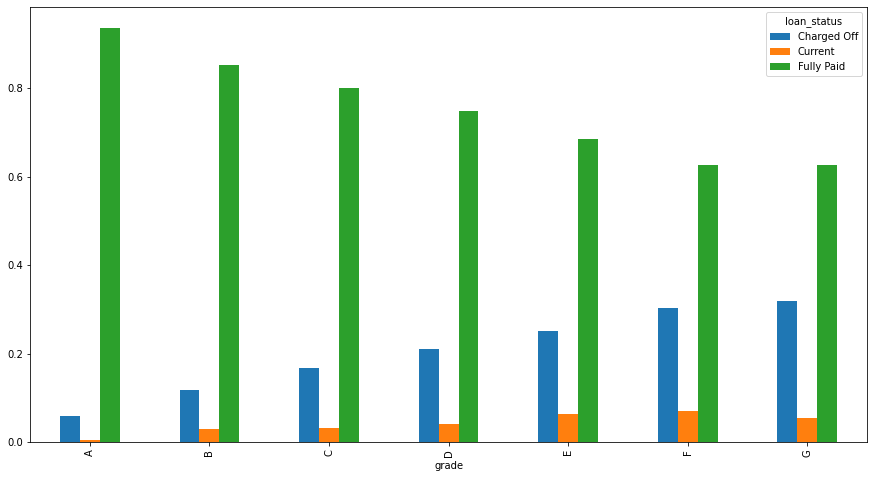

In [ ]:
# calculate proportions of loan status within each grade, which means proportion of fully paid charged off andf current should add up to 100 within each grade 

df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,8));

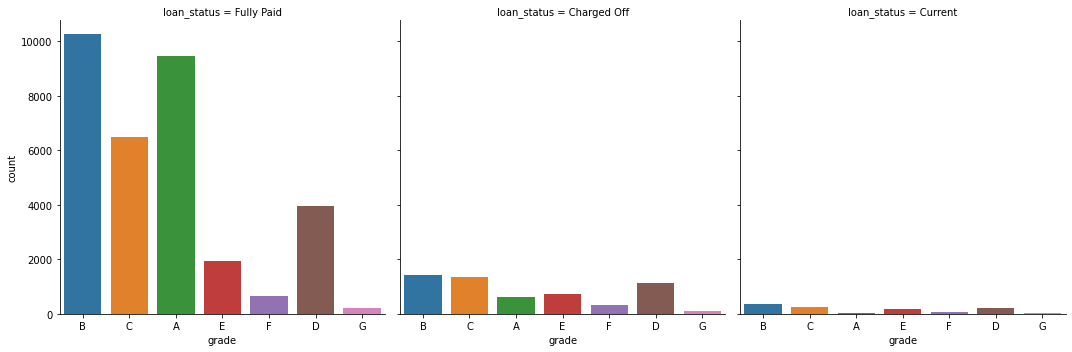

In [ ]:
sns.factorplot("grade", col='loan_status', col_wrap=3, data=df, kind='count');

Grade category "C", "E", "F" and "D" has maximum charged off ratio. Grade "A" shows fair records.

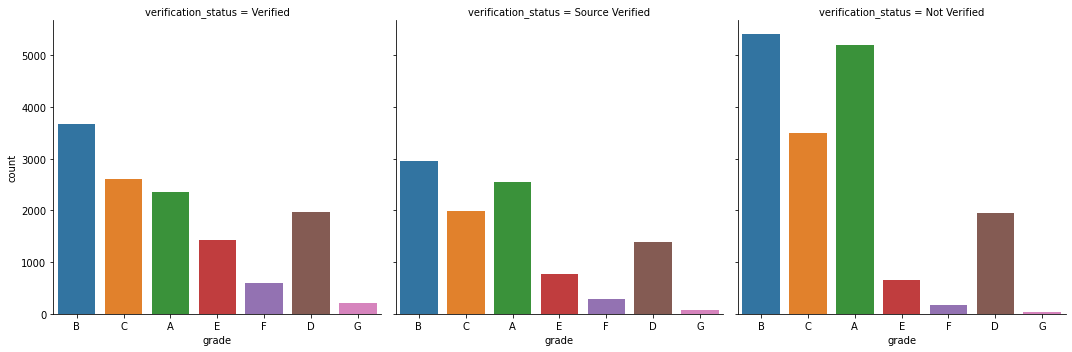

In [ ]:
sns.factorplot("grade", col='verification_status', col_wrap=3, data=df, kind='count');

From the above graph we can say that we need to do verification of grade C, D, E, and F category person to reduce or control risk of loss.

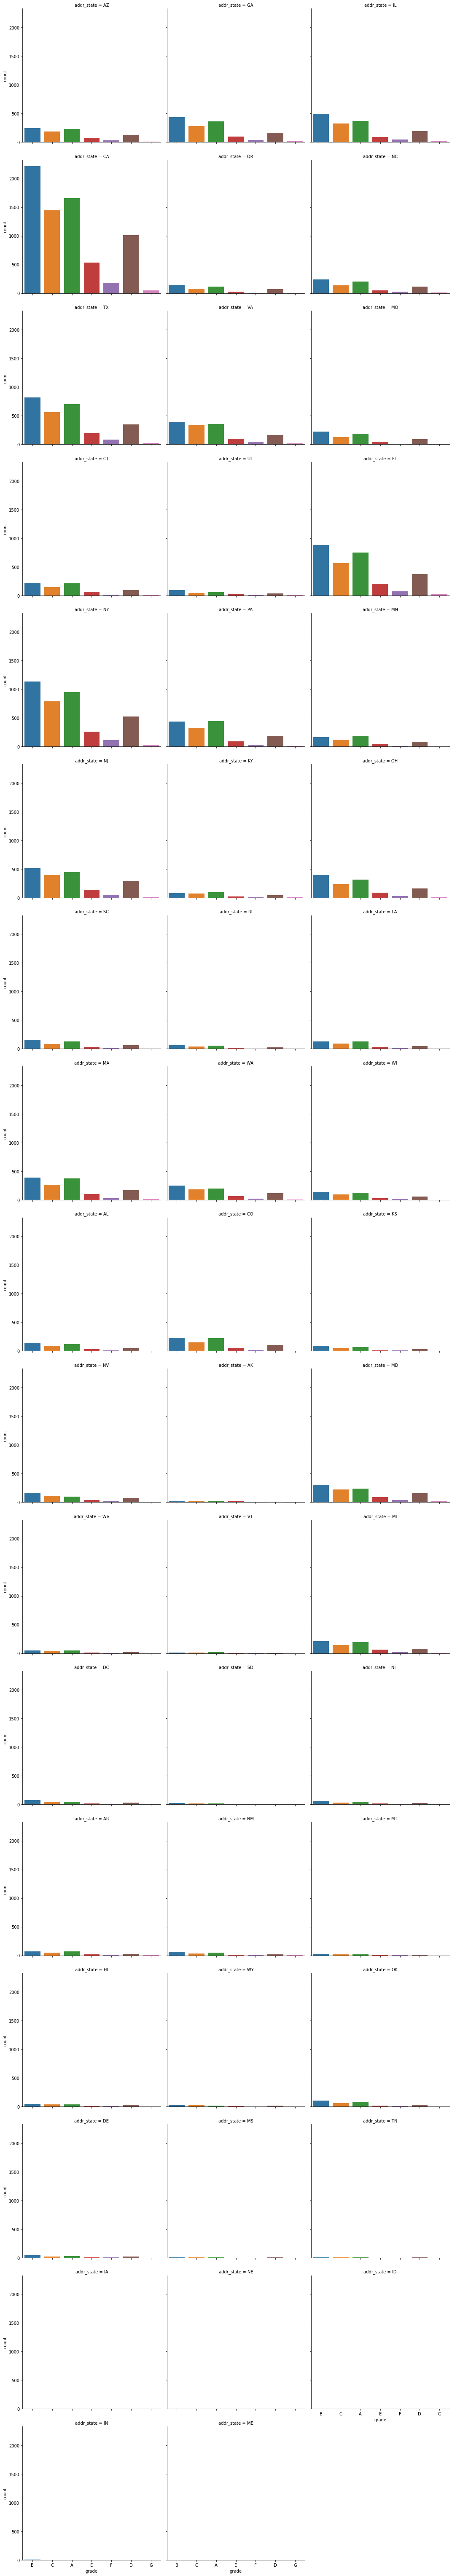

In [ ]:
sns.factorplot("grade", col='addr_state', col_wrap=3, data=df, kind='count');

To check the dependency of interested categorical variables need to create a contingency table because the chi-square test could only be performed at table

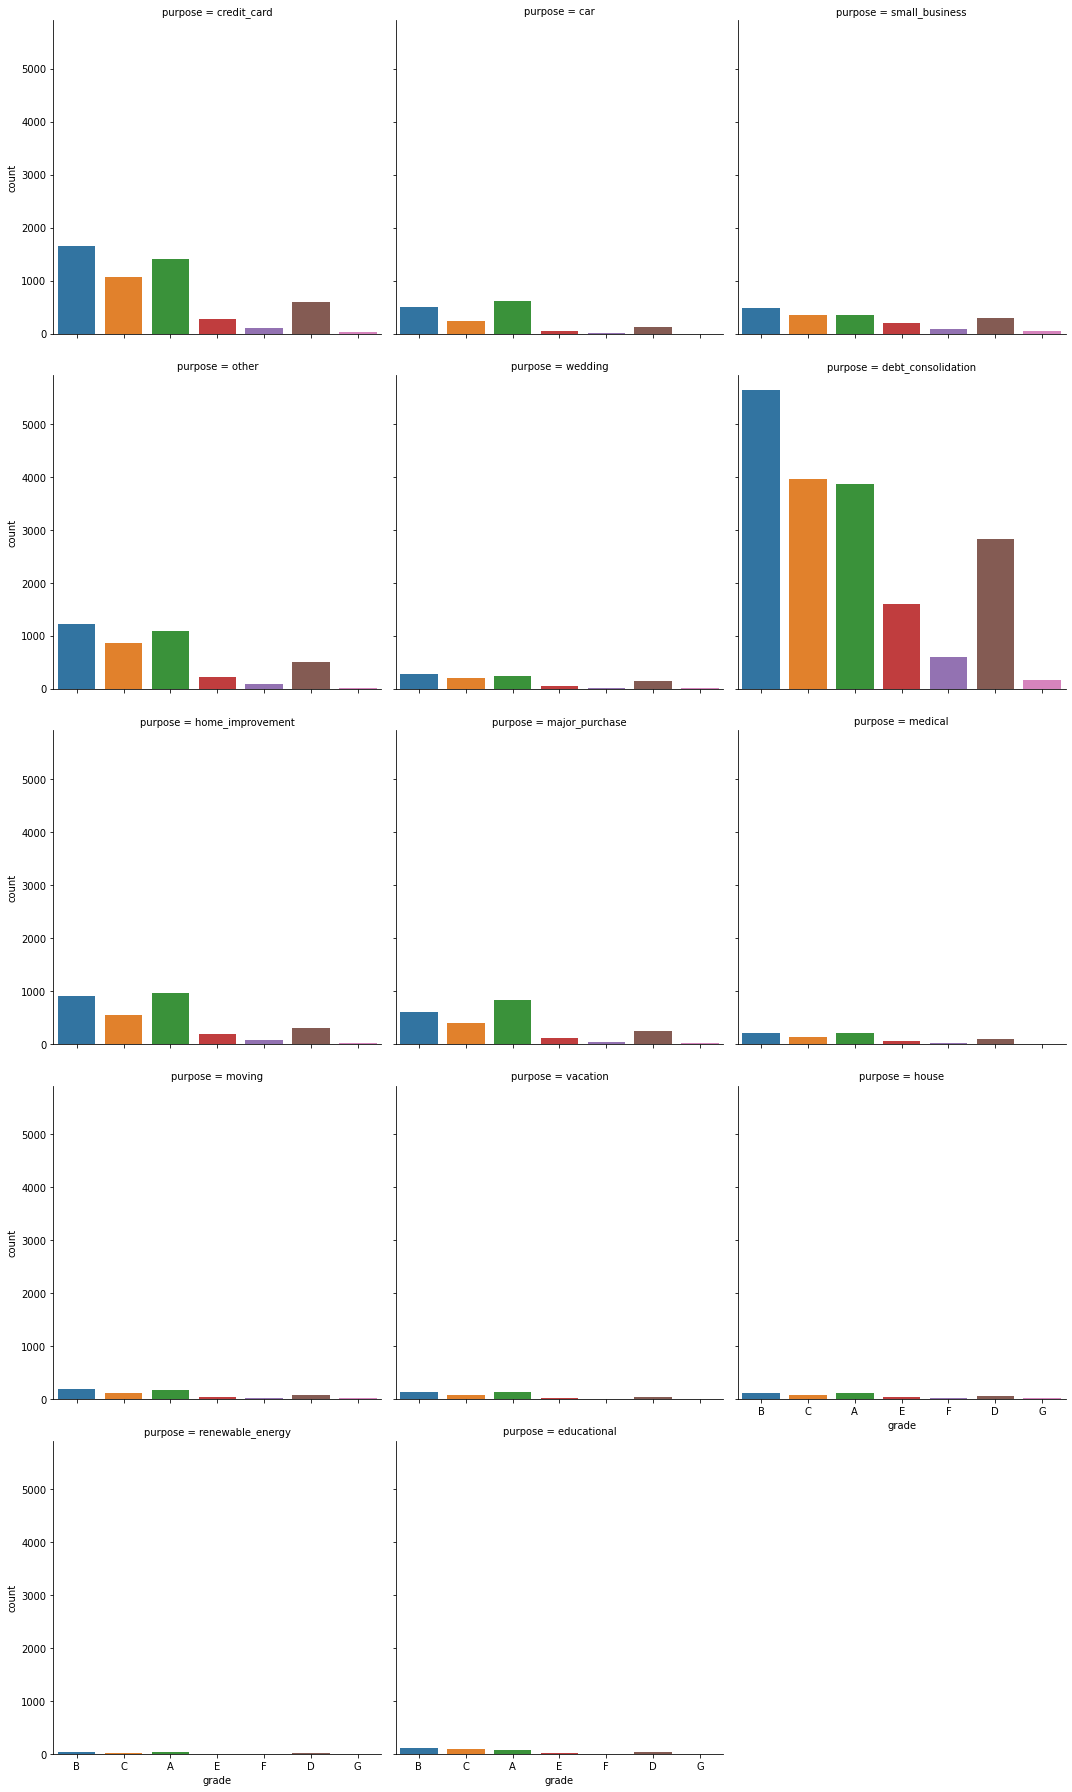

In [ ]:
sns.factorplot("grade", col='purpose', col_wrap=3, data=df, kind='count');

## Statistical Test (Chi^2)

### Null Hypothesis Ho : The two variables are independent from eachother
### Alternate Hypothesis: The two variables are dependend to eachother

In [ ]:
cont1 = pd.crosstab(df["verification_status"], df["loan_status"])
print('contingency_table :\n',cont1)

contingency_table :
 loan_status          Charged Off  Current  Fully Paid
verification_status                                  
Not Verified                2142      227       14552
Source Verified             1434      310        8243
Verified                    2051      603       10155


In [ ]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cont1)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     388.5
p-value:            8.4894e-83
degrees of freedom: 4
expected frequencies:
 [[ 2397.32273334   485.68471939 14037.99254727]
 [ 1414.93186797   286.65760254  8285.4105295 ]
 [ 1814.7453987    367.65767807 10626.59692323]]


The p-value is less than 0.05 (significance value) then we reject the Null hypothesis.

These two verification_status and loan_status are dependent as shows the probability value in above test.

# Final Conclusion:

After the above analysis, we have following observations.
1. Mostly, the people assoociated to grade "C","D","E" and "F" category has charged off.
2. Their purpose of taking loan are debt consolidation. 
3. It is also observe that, their souce is not verified. So we need to verify the source of income of people belonging to above grades.
4. The people that has charged off belongs to address_state CA.

      On the basis of above stated points we can conclude that to minimise the risk of losing money while lending to customers bank should consider above points. 

In [ ]:
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
